In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install xgboost



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats


In [3]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

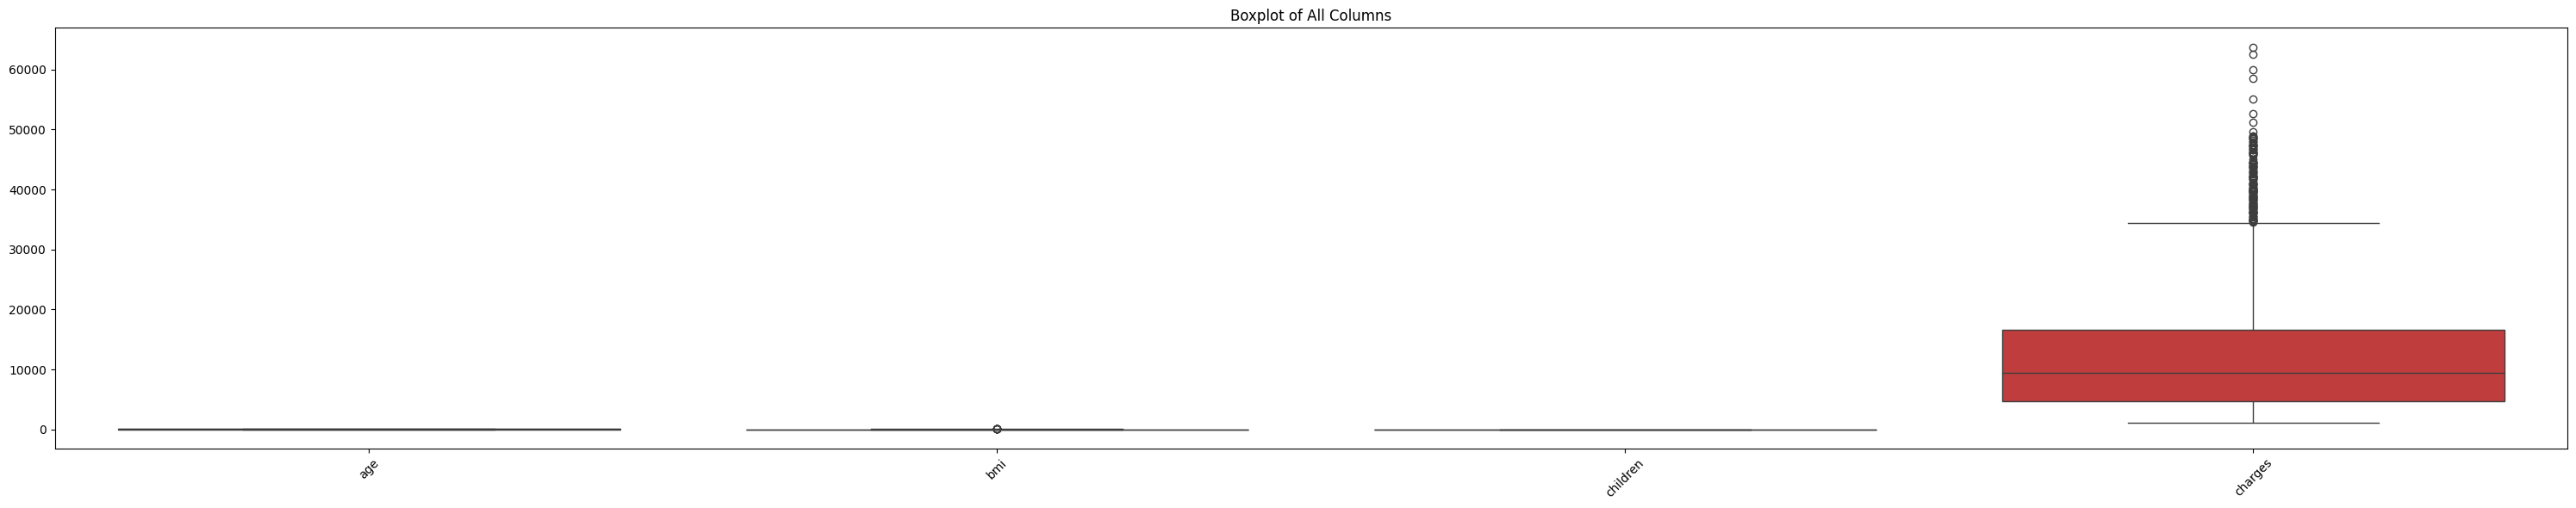

In [5]:
plt.figure(figsize=(30, 6)) 
sns.boxplot(data=df)

plt.xticks(rotation=45) 
plt.title("Boxplot of All Columns")

plt.tight_layout()
plt.show()

In [6]:
df2 = df.copy()
z=np.abs(stats.zscore(df2['age']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)


z=np.abs(stats.zscore(df2['bmi']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

z=np.abs(stats.zscore(df2['children']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

z=np.abs(stats.zscore(df2['charges']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 3)[0]], inplace=True)

(array([], dtype=int64),)
(array([ 116,  847, 1047, 1317]),)
(array([  32,   71,  165,  412,  424,  437,  567,  639,  875,  930,  935,
        967,  982, 1082, 1113, 1127, 1242, 1269]),)
(array([  33,  536,  569,  810, 1127, 1211, 1279]),)


In [7]:
df2.reset_index(drop=True, inplace=True)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1309 non-null   int64  
 1   sex       1309 non-null   object 
 2   bmi       1309 non-null   float64
 3   children  1309 non-null   int64  
 4   smoker    1309 non-null   object 
 5   region    1309 non-null   object 
 6   charges   1309 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 71.7+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# X=df2.drop("charges",axis=1)
# y=df2["charges"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# model = LinearRegression()
# model.fit(X_train,y_train)
# y_pred=model.predict(X_test)
# model.score(X_test,y_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# model_score = model.score(X_test, y_test)

# print(f"Mean Squared Error : {mse}")
# print(f"R^2 Score : {r2}")
# print(f"Model Score : {model_score}")# 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assume df2 is the DataFrame with the features and target variable

# Separate features and target
X = df2.drop("charges", axis=1)
y = df2["charges"]

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Define the column transformer
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_columns),    # Apply OneHotEncoder to categorical columns
    ('scaler', StandardScaler(), numerical_columns)       # Apply StandardScaler to numerical columns
])

# Define the pipeline with preprocessor and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=50))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = pipeline.score(X_test, y_test)

print(f"Root Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
print(f"Model Score: {model_score}")


In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Define the search space for hyperparameters
search_space = {
    'model__n_estimators': Integer(50, 500),         # Range for number of trees
    'model__max_leaf_nodes': Integer(10, 50),        # Range for max leaf nodes
    'model__min_samples_leaf': Integer(1, 10)        # Range for min samples per leaf
}

# Set up the BayesSearchCV with pipeline and RandomForestRegressor
bayes_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space,
    n_iter=100,                          # Number of parameter settings sampled
    cv=5,                               # 5-fold cross-validation
    scoring='neg_mean_squared_error',    # Use MSE as the scoring metric
    random_state=42,
    n_jobs=-1                            # Use all available cores
)

# Fit BayesSearchCV
bayes_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", bayes_search.best_params_)
print("Best Score (Negative MSE):", bayes_search.best_score_)

# Use the best estimator to predict on the test set
best_pipeline = bayes_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

# y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = pipeline.score(X_test, y_test)

print(f"Root Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
print(f"Model Score: {model_score}")


In [ ]:
import matplotlib.pyplot as plt
from pyswarm import pso
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming df2 is the DataFrame with the features and target variable
X = df2.drop("charges", axis=1)
y = df2["charges"]

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Define the column transformer
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_columns),    # Apply OneHotEncoder to categorical columns
    ('scaler', StandardScaler(), numerical_columns)       # Apply StandardScaler to numerical columns
])

# Define the pipeline with preprocessor and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for PSO
def objective(params):
    n_estimators = int(params[0])  # Convert to int
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    min_samples_leaf = int(params[3])
    
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    
    pipeline.set_params(model=model)
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    
    return mse  # Minimize RMSE

# Define the bounds for the hyperparameters
lb = [50, 10, 2, 1]  # Lower bounds for each parameter
ub = [500, 100, 20, 10]  # Upper bounds for each parameter

# Function to visualize PSO progress
def plot_pso_progress(iteration, swarm_positions, swarm_fitness):
    plt.clf()  # Clear previous plot
    plt.scatter(swarm_positions[:, 0], swarm_fitness, color='blue', label='Particles')
    plt.scatter(swarm_positions[:, 0][np.argmin(swarm_fitness)], np.min(swarm_fitness), color='red', label='Best Particle')
    plt.title(f'PSO Iteration {iteration}')
    plt.xlabel('n_estimators')
    plt.ylabel('RMSE (Fitness)')
    plt.legend()
    plt.pause(0.1)  # Pause for a brief moment to update the plot
    plt.show()

# Wrapper for PSO to track progress
def pso_with_progress_tracking(objective, lb, ub, swarm_size=30, maxiter=50):
    all_positions = []
    all_fitness = []
    
    # Function to track fitness and positions after each iteration
    def track_progress(x, f):
        all_positions.append(x)
        all_fitness.append(f)
        plot_pso_progress(len(all_positions), np.array(all_positions), np.array(all_fitness))
    
    # Run PSO
    best_params, _ = pso(objective, lb, ub, swarmsize=swarm_size, maxiter=maxiter, debug=True, f_ieqcons=None)
    
    return best_params

# Run PSO with progress tracking
best_params = pso_with_progress_tracking(objective, lb, ub, swarm_size=30, maxiter=50)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(
    n_estimators=int(best_params[0]),
    max_depth=int(best_params[1]),
    min_samples_split=int(best_params[2]),
    min_samples_leaf=int(best_params[3])
)

pipeline.set_params(model=best_model)
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred, squared=False)
# print(f"Root Mean Squared Error: {mse}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = pipeline.score(X_test, y_test)

print(f"Root Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
print(f"Model Score: {model_score}")



In [ ]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Assuming df2 is the DataFrame with the features and target variable
X = df2.drop("charges", axis=1)
y = df2["charges"]

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Define the column transformer
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_columns),    # Apply OneHotEncoder to categorical columns
    ('scaler', StandardScaler(), numerical_columns)       # Apply StandardScaler to numerical columns
])

# Define the pipeline with preprocessor and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters to train the model
params = [74.40930838, 72.5444489, 17.00966956, 9.51229814]

# Map the parameters to the RandomForestRegressor hyperparameters
n_estimators = int(params[0])  # Convert to int
max_depth = int(params[1])
min_samples_split = int(params[2])
min_samples_leaf = int(params[3])

# Set the model with the provided parameters
model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf
)

# Update the pipeline with the model
pipeline.set_params(model=model)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred, squared=False)
# print(f"Root Mean Squared Error: {mse}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = pipeline.score(X_test, y_test)

print(f"Root Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
print(f"Model Score: {model_score}")
# Save the pipeline to a pickle file
with open("pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully!")


In [ ]:
!pip install pyswarm

In [ ]:
def objective(params):
    # Create the model with the parameters from Hyperopt
    model = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf'])
    )
    
    # Create a pipeline with the preprocessor and model
    pipeline.set_params(model=model)
    
    # Train the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model (Root Mean Squared Error in this case)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    
    return mse  # Objective function should return the value to minimize (mse in this case)

# Define the search space for the hyperparameters
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 1),  # Number of trees
    'max_depth': hp.quniform('max_depth', 10, 100, 1),         # Max depth of the tree
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),  # Minimum samples to split a node
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1)     # Minimum samples per leaf
}

# Create a Trials object to keep track of the optimization process
trials = Trials()

# Run the optimization using the Tree-structured Parzen Estimator (TPE) algorithm
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=30, trials=trials)

# Print the best hyperparameters
print("Best Hyperparameters:", best)

# Refit the model with the best hyperparameters found
best_model = RandomForestRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_split=int(best['min_samples_split']),
    min_samples_leaf=int(best['min_samples_leaf'])
)
pipeline.set_params(model=best_model)

# Train the final model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = pipeline.score(X_test, y_test)

print(f"Root Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
print(f"Model Score: {model_score}")


In [ ]:
np.array(df2.iloc[26])

In [ ]:
pipeline.predict(df2.drop(columns="charges").iloc[[26]])

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = rf_model.score(X_test, y_test)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")
print(f"Model Score : {model_score}")

In [ ]:
# Residuals
residuals = np.array(y_test) - np.array(y_pred)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Predicted Insurance Cost')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')

# Show plot
plt.show()

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
X=df2.drop("charges",axis=1)
y1=df2["charges"]
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
xgb_model.fit(X_train, y1_train)
y1_pred_xgb = xgb_model.predict(X_test)
model_score = xgb_model.score(X_test , y_test)
mse_xgb = mean_squared_error(y1_test, y1_pred_xgb)
r2_xgb = r2_score(y1_test, y1_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R^2 Score: {r2_xgb}")
print(f"XGBoost - Model Score: {model_score}")

# Check Updates

In [ ]:
import pickle
with open("insurance_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)